In [1]:
# Step 1 : IMPORT PANDA LIBRARY
import pandas as pd
# Step 2: Set the file path (use raw string to avoid escape character issues on Windows)
file_path = r"C:\Users\Sezy\OneDrive\Housing_Prices\Raw_Data\US_Metro_housing_prices.csv"
# Step 3: Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
# Step 4: Preview the first few rows to verify it's loaded correctly
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025
0,102001,0,United States,country,NaN,124397.5452,124609.7489,124873.0407,125438.5011,126089.3757,...,3.656954e+05,3.659891e+05,3.664920e+05,3.671549e+05,3.677465e+05,3.685688e+05,3.692755e+05,3.697865e+05,3.695374e+05,3.690399e+05
1,394913,1,"New York, NY",msa,NY,222850.1379,223792.0448,224739.2630,226655.0417,228628.8259,...,7.033239e+05,7.070718e+05,7.113336e+05,7.152540e+05,7.181908e+05,7.198386e+05,7.206852e+05,7.219450e+05,7.237650e+05,7.266368e+05
2,753899,2,"Los Angeles, CA",msa,CA,240464.2128,241381.9084,242576.5564,244957.4337,247541.3190,...,1.026388e+06,1.032245e+06,1.039446e+06,1.045433e+06,1.050661e+06,1.055384e+06,1.056097e+06,1.053898e+06,1.048431e+06,1.043903e+06
3,394463,3,"Chicago, IL",msa,IL,162806.7483,162964.8156,163255.8983,163979.9672,164845.2594,...,3.491714e+05,3.501768e+05,3.513652e+05,3.525793e+05,3.539429e+05,3.554716e+05,3.569916e+05,3.584737e+05,3.594342e+05,3.602998e+05
4,394514,4,"Dallas, TX",msa,TX,131841.8809,131900.1922,131972.1469,132154.6148,132389.6031,...,3.895231e+05,3.888560e+05,3.886686e+05,3.885789e+05,3.883051e+05,3.877716e+05,3.872307e+05,3.864066e+05,3.848444e+05,3.826341e+05


Melt: change the df to import into sql


In [5]:
# Step 2: Melt the data (convert from wide to long format)
df_long = df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='Price'
)

# Step 3: Convert 'Date' from string to datetime (MM/DD/YYYY format)
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m/%d/%Y')

# Step 4: Sort the data for easier viewing and analysis
df_long = df_long.sort_values(['RegionName', 'Date'])

# Step 5 (Optional): Save cleaned version for SQL/Tableau use
output_path = r"C:\Users\Sezy\OneDrive\Housing_Prices\Cleaned_Data\US_Metro_housing_prices_long.csv"
df_long.to_csv(output_path, index=False)

# Quick check
df_long.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
268495,753929,935,"Zapata, TX",msa,TX,2024-12-31,132117.7415
269390,753929,935,"Zapata, TX",msa,TX,2025-01-31,131617.6456
270285,753929,935,"Zapata, TX",msa,TX,2025-02-28,131088.8283
271180,753929,935,"Zapata, TX",msa,TX,2025-03-31,130350.3894
272075,753929,935,"Zapata, TX",msa,TX,2025-04-30,128275.4860


Checking for missing data


In [6]:
# Count total missing values in the 'Price' column
missing_count = df_long['Price'].isna().sum()
print(f"Missing price values: {missing_count}")


Missing price values: 49260


In [7]:
# View some rows where price is missing
df_long[df_long['Price'].isna()].head()


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
658,394297,677,"Aberdeen, SD",msa,SD,2000-01-31,NaN
1553,394297,677,"Aberdeen, SD",msa,SD,2000-02-29,NaN
2448,394297,677,"Aberdeen, SD",msa,SD,2000-03-31,NaN
3343,394297,677,"Aberdeen, SD",msa,SD,2000-04-30,NaN
4238,394297,677,"Aberdeen, SD",msa,SD,2000-05-31,NaN


Filter: X > 2010

In [9]:
# 1. Filter to recent years only
df_recent = df_long[df_long['Date'] >= '2010-01-01']
df_recent.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
108058,394297,677,"Aberdeen, SD",msa,SD,2010-01-31,131237.5905
108953,394297,677,"Aberdeen, SD",msa,SD,2010-02-28,131219.7383
109848,394297,677,"Aberdeen, SD",msa,SD,2010-03-31,131266.7507
110743,394297,677,"Aberdeen, SD",msa,SD,2010-04-30,131412.1359
111638,394297,677,"Aberdeen, SD",msa,SD,2010-05-31,131777.8433


In [11]:
# Make sure Date is datetime (should already be, but double-check)
df_recent['Date'] = pd.to_datetime(df_recent['Date'])

# Sort by RegionName and Date so data is in correct order per metro
df_recent = df_recent.sort_values(by=['RegionName', 'Date'])


C:\Users\Sezy\AppData\Local\Temp\ipykernel_21756\1580084200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Date'] = pd.to_datetime(df_recent['Date'])


In [12]:
filled_list = []

for region, group in df_recent.groupby('RegionName'):
    # Create a full monthly timeline for this metro
    all_months = pd.date_range(start=group['Date'].min(), end=group['Date'].max(), freq='M')
    
    # Reindex to fill missing months explicitly
    group = group.set_index('Date').reindex(all_months)
    
    # Re-add RegionName for the new rows
    group['RegionName'] = region
    
    # Identify consecutive missing months
    is_na = group['Price'].isna()
    na_runs = is_na.astype(int).groupby(is_na.ne(is_na.shift()).cumsum()).sum()
    
    # Only fill if the longest missing gap is 2 months or less
    if na_runs.max() <= 2:
        # Interpolate missing prices for short gaps
        group['Price'] = group['Price'].interpolate(method='linear', limit=2, limit_direction='both')
        
        # Reset index and rename date column
        group.reset_index(inplace=True)
        group.rename(columns={'index': 'Date'}, inplace=True)
        
        filled_list.append(group)

# Combine cleaned metros into one dataframe
df_filled = pd.concat(filled_list, ignore_index=True)


In [14]:
# Look at the cleaned dataframe shape and first few rows

df_filled.head()


,Date,RegionID,SizeRank,RegionName,RegionType,StateName,Price
0,2010-01-31,394297,677,"Aberdeen, SD",msa,SD,131237.5905
1,2010-02-28,394297,677,"Aberdeen, SD",msa,SD,131219.7383
2,2010-03-31,394297,677,"Aberdeen, SD",msa,SD,131266.7507
3,2010-04-30,394297,677,"Aberdeen, SD",msa,SD,131412.1359
4,2010-05-31,394297,677,"Aberdeen, SD",msa,SD,131777.8433


In [15]:
# Count how many missing values are in the Price column
missing_prices = df_filled['Price'].isna().sum()
print(f"Missing price values after filling: {missing_prices}")


Missing price values after filling: 0


In [16]:
print(f"Number of metros after cleaning: {df_filled['RegionName'].nunique()}")


Number of metros after cleaning: 754


In [17]:
print(f"Date range in cleaned data: {df_filled['Date'].min()} to {df_filled['Date'].max()}")


Date range in cleaned data: 2010-01-31 00:00:00 to 2025-04-30 00:00:00


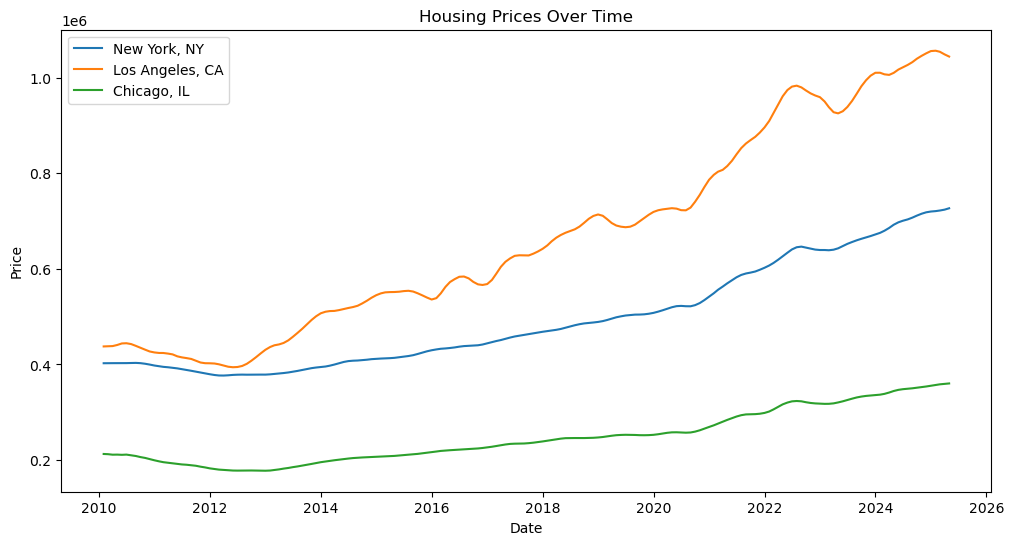

In [18]:
import matplotlib.pyplot as plt

metros_to_plot = ['New York, NY', 'Los Angeles, CA', 'Chicago, IL']

plt.figure(figsize=(12, 6))
for metro in metros_to_plot:
    metro_data = df_filled[df_filled['RegionName'] == metro]
    plt.plot(metro_data['Date'], metro_data['Price'], label=metro)

plt.title("Housing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [19]:
df_filled.to_csv('Cleaned_Housing_Prices.csv', index=False)
